In [1]:
from preprocessing import *
import preprocessing as prp
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as data_utils
from usad import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv(r"/home/medoro/Unsupervised_Anomaly_Detection_thesis/data/train.csv")
dataframe.shape

(1749494, 57)

In [3]:
df=dataframe[['building_id','primary_use', 'timestamp', 'meter_reading', 'sea_level_pressure', 'is_holiday','anomaly']]
df

,building_id,primary_use,timestamp,meter_reading,sea_level_pressure,is_holiday,anomaly
0,1,Education,2016-01-01 00:00:00,NaN,967.2,1,0
1,32,Office,2016-01-01 00:00:00,NaN,967.2,1,0
2,41,Office,2016-01-01 00:00:00,NaN,967.2,1,0
3,55,Office,2016-01-01 00:00:00,NaN,967.2,1,0
4,69,Parking,2016-01-01 00:00:00,NaN,967.2,1,0
...,...,...,...,...,...,...,...
1749489,1316,Entertainment/public assembly,2016-12-31 23:00:00,38.844,967.2,0,0
1749490,1318,Entertainment/public assembly,2016-12-31 23:00:00,202.893,967.2,0,0
1749491,1319,Entertainment/public assembly,2016-12-31 23:00:00,NaN,967.2,0,0
1749492,1323,Office,2016-12-31 23:00:00,172.000,967.2,0,0


In [4]:
imputed_df = impute_nulls(df)
imputed_df

,building_id,primary_use,timestamp,meter_reading,sea_level_pressure,is_holiday,anomaly
0,1,Education,2016-01-01 00:00:00,31.477940,967.2,1,0
200,1,Education,2016-01-01 01:00:00,29.582970,1019.4,1,0
398,1,Education,2016-01-01 02:00:00,28.635485,1018.8,1,0
597,1,Education,2016-01-01 03:00:00,28.161742,1018.1,1,0
796,1,Education,2016-01-01 04:00:00,27.924871,1019.0,1,0
...,...,...,...,...,...,...,...
1748693,1353,Religious worship,2016-12-31 19:00:00,2.425000,967.2,0,0
1748893,1353,Religious worship,2016-12-31 20:00:00,2.450000,967.2,0,0
1749093,1353,Religious worship,2016-12-31 21:00:00,2.425000,967.2,0,0
1749293,1353,Religious worship,2016-12-31 22:00:00,2.450000,967.2,0,0


Now that we have imputed the missing values for the column containing the energy consumption measurements, we can procees by adding a couple of features more and further imputing the missing dates for each timeseries in the dataset.

In [5]:
df = add_trigonometric_features(imputed_df)
df

,building_id,primary_use,timestamp,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x
0,1,Education,2016-01-01 00:00:00,31.477940,967.2,1,0,4,-0.433884,-0.900969
200,1,Education,2016-01-01 01:00:00,29.582970,1019.4,1,0,4,-0.433884,-0.900969
398,1,Education,2016-01-01 02:00:00,28.635485,1018.8,1,0,4,-0.433884,-0.900969
597,1,Education,2016-01-01 03:00:00,28.161742,1018.1,1,0,4,-0.433884,-0.900969
796,1,Education,2016-01-01 04:00:00,27.924871,1019.0,1,0,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...
1748693,1353,Religious worship,2016-12-31 19:00:00,2.425000,967.2,0,0,5,-0.974928,-0.222521
1748893,1353,Religious worship,2016-12-31 20:00:00,2.450000,967.2,0,0,5,-0.974928,-0.222521
1749093,1353,Religious worship,2016-12-31 21:00:00,2.425000,967.2,0,0,5,-0.974928,-0.222521
1749293,1353,Religious worship,2016-12-31 22:00:00,2.450000,967.2,0,0,5,-0.974928,-0.222521


In [6]:
dfs_dict = impute_missing_dates(df)

In [7]:
df1 = pd.concat(dfs_dict.values())
df1

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x
2016-01-01 00:00:00,1,Education,31.477940,967.2,1,0,4,-0.433884,-0.900969
2016-01-01 01:00:00,1,Education,29.582970,1019.4,1,0,4,-0.433884,-0.900969
2016-01-01 02:00:00,1,Education,28.635485,1018.8,1,0,4,-0.433884,-0.900969
2016-01-01 03:00:00,1,Education,28.161742,1018.1,1,0,4,-0.433884,-0.900969
2016-01-01 04:00:00,1,Education,27.924871,1019.0,1,0,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1353,Religious worship,2.425000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 20:00:00,1353,Religious worship,2.450000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 21:00:00,1353,Religious worship,2.425000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 22:00:00,1353,Religious worship,2.450000,967.2,0,0,5,-0.974928,-0.222521


Let's now obtain the train and validation set. We are going to split the dataset into 2 sets, according to the building id.

In [8]:
dfs_train, dfs_val, dfs_test = train_val_test_split(df1)
train = pd.concat(dfs_train.values())

In [9]:
val = pd.concat(dfs_val.values())

In [10]:
test = pd.concat(dfs_test.values())

In [11]:
train

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x
2016-01-01 00:00:00,1,Education,31.477940,967.2,1,0,4,-0.433884,-0.900969
2016-01-01 01:00:00,1,Education,29.582970,1019.4,1,0,4,-0.433884,-0.900969
2016-01-01 02:00:00,1,Education,28.635485,1018.8,1,0,4,-0.433884,-0.900969
2016-01-01 03:00:00,1,Education,28.161742,1018.1,1,0,4,-0.433884,-0.900969
2016-01-01 04:00:00,1,Education,27.924871,1019.0,1,0,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1238,Office,54.900000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 20:00:00,1238,Office,56.000000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 21:00:00,1238,Office,66.400000,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 22:00:00,1238,Office,67.100000,967.2,0,0,5,-0.974928,-0.222521


In [12]:
val

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x
2016-01-01 00:00:00,1241,Healthcare,234.180,1018.9,1,0,4,-0.433884,-0.900969
2016-01-01 01:00:00,1241,Healthcare,294.156,1018.4,1,0,4,-0.433884,-0.900969
2016-01-01 02:00:00,1241,Healthcare,354.152,1018.2,1,0,4,-0.433884,-0.900969
2016-01-01 03:00:00,1241,Healthcare,294.121,1018.3,1,0,4,-0.433884,-0.900969
2016-01-01 04:00:00,1241,Healthcare,294.102,1018.2,1,0,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1353,Religious worship,2.425,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 20:00:00,1353,Religious worship,2.450,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 21:00:00,1353,Religious worship,2.425,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 22:00:00,1353,Religious worship,2.450,967.2,0,0,5,-0.974928,-0.222521


In [13]:
test

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x
2016-01-01 00:00:00,69,Parking,19.232375,967.2,1,0,4,-0.433884,-0.900969
2016-01-01 01:00:00,69,Parking,13.457187,1019.4,1,0,4,-0.433884,-0.900969
2016-01-01 02:00:00,69,Parking,10.569594,1018.8,1,0,4,-0.433884,-0.900969
2016-01-01 03:00:00,69,Parking,9.125797,1018.1,1,0,4,-0.433884,-0.900969
2016-01-01 04:00:00,69,Parking,8.403898,1019.0,1,0,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1319,Entertainment/public assembly,132.040616,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 20:00:00,1319,Entertainment/public assembly,132.040616,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 21:00:00,1319,Entertainment/public assembly,132.040616,967.2,0,0,5,-0.974928,-0.222521
2016-12-31 22:00:00,1319,Entertainment/public assembly,132.040616,967.2,0,0,5,-0.974928,-0.222521


# Training the model

In [14]:
train_window = 72

In [17]:
X_train, y_train = create_multivariate_train_eval_sequences(train, train_window)

In [18]:
X_train, y_train

(array([[[0.60893402, 0.        , 0.        , 0.27747907, 1.        ],
         [0.54943545, 0.82857143, 0.        , 0.27747907, 1.        ],
         [0.51968617, 0.81904762, 0.        , 0.27747907, 1.        ],
         ...,
         [0.48993689, 0.77936508, 0.80193774, 0.09903113, 0.        ],
         [0.48993689, 0.        , 0.80193774, 0.09903113, 0.        ],
         [0.48993689, 0.76825397, 0.80193774, 0.09903113, 0.        ]],
 
        [[0.54943545, 0.82857143, 0.        , 0.27747907, 1.        ],
         [0.51968617, 0.81904762, 0.        , 0.27747907, 1.        ],
         [0.50481153, 0.80793651, 0.        , 0.27747907, 1.        ],
         ...,
         [0.48993689, 0.        , 0.80193774, 0.09903113, 0.        ],
         [0.48993689, 0.76825397, 0.80193774, 0.09903113, 0.        ],
         [0.48993689, 0.75714286, 1.        , 0.5       , 0.        ]],
 
        [[0.51968617, 0.81904762, 0.        , 0.27747907, 1.        ],
         [0.50481153, 0.80793651, 0.       

In [19]:
X_train.shape, y_train.shape

((1123848, 72, 5), (1123848, 72))

In [20]:
BATCH_SIZE =  128
N_EPOCHS = 40
hidden_size = 1/8

In [21]:
w_size = X_train.shape[1] * X_train.shape[2]
z_size = w_size * hidden_size 
w_size, z_size

(360, 45.0)

In [22]:
z_size = int(z_size)

In [23]:
z_size

45

In [24]:
import torch.utils.data as data_utils

In [25]:
train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_train).float().contiguous().view(([X_train.shape[0], w_size]))), batch_size = BATCH_SIZE, shuffle = False, num_workers = 0) #.view(([X_train.shape[0], w_size]))

In [26]:
X_val, y_val = create_multivariate_train_eval_sequences(val, train_window)

In [27]:
X_val.shape, y_val.shape

((287496, 72, 5), (287496, 72))

In [28]:
val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_val).float().contiguous().view(([X_val.shape[0],w_size]))) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0) #.view(([X_val.shape[0],w_size]))

In [31]:
!export CUDA_VISIBLE_DEVICES=2

In [26]:
device = get_default_device()
device

device(type='cuda')

In [32]:
model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [34]:
print(device)

cuda


In [33]:
history = training(N_EPOCHS,model,train_loader,val_loader) #2.15 min a epoch

Epoch [0], val_loss1: 0.0095, val_loss2: 0.0092
Epoch [1], val_loss1: 0.0126, val_loss2: -0.0024
Epoch [2], val_loss1: 0.0148, val_loss2: -0.0082
Epoch [3], val_loss1: 0.0206, val_loss2: -0.0142
Epoch [4], val_loss1: 0.0183, val_loss2: -0.0133
Epoch [5], val_loss1: 0.0265, val_loss2: -0.0203
Epoch [6], val_loss1: 0.0226, val_loss2: -0.0184
Epoch [7], val_loss1: 0.0183, val_loss2: -0.0151
Epoch [8], val_loss1: 0.0277, val_loss2: -0.0228
Epoch [9], val_loss1: 0.0229, val_loss2: -0.0196
Epoch [10], val_loss1: 0.0194, val_loss2: -0.0168
Epoch [11], val_loss1: 0.0239, val_loss2: -0.0209
Epoch [12], val_loss1: 0.0232, val_loss2: -0.0203
Epoch [13], val_loss1: 0.0216, val_loss2: -0.0192
Epoch [14], val_loss1: 0.0263, val_loss2: -0.0233
Epoch [15], val_loss1: 0.0464, val_loss2: -0.0424
Epoch [16], val_loss1: 0.0443, val_loss2: -0.0405
Epoch [17], val_loss1: 0.0318, val_loss2: -0.0290
Epoch [18], val_loss1: 0.0296, val_loss2: -0.0271
Epoch [19], val_loss1: 0.0251, val_loss2: -0.0230
Epoch [20],

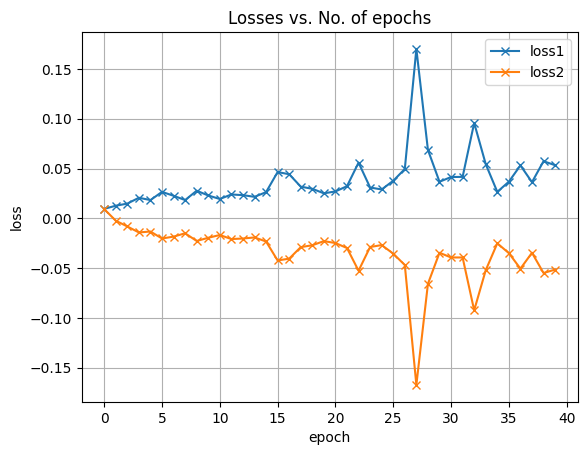

In [34]:
plot_history(history)

In [37]:
print(model)

UsadModel(
  (encoder): Encoder(
    (linear1): Linear(in_features=72, out_features=36, bias=True)
    (linear2): Linear(in_features=36, out_features=18, bias=True)
    (linear3): Linear(in_features=18, out_features=9, bias=True)
    (relu): ReLU(inplace=True)
  )
  (decoder1): Decoder(
    (linear1): Linear(in_features=9, out_features=18, bias=True)
    (linear2): Linear(in_features=18, out_features=36, bias=True)
    (linear3): Linear(in_features=36, out_features=72, bias=True)
    (relu): ReLU(inplace=True)
    (sigmoid): Sigmoid()
  )
  (decoder2): Decoder(
    (linear1): Linear(in_features=9, out_features=18, bias=True)
    (linear2): Linear(in_features=18, out_features=36, bias=True)
    (linear3): Linear(in_features=36, out_features=72, bias=True)
    (relu): ReLU(inplace=True)
    (sigmoid): Sigmoid()
  )
)


In [35]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_40epochs_multivariate.pth")

# Testing

In [35]:
checkpoint = torch.load("/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_40epochs_multivariate.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [36]:
X_test, y_test = create_multivariate_train_eval_sequences(test, train_window)

In [37]:
X_test.shape, y_test.shape

((331056, 72, 5), (331056, 72))

In [38]:
test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(X_test).float().contiguous().view(([X_test.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

## Testing (anomaly score-based)

In [39]:
results=testing(model,test_loader) #Prova con il test set

Let's create the dataset to perform predictions.

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))

In [42]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading', 'sea_level_pressure', 'weekday_x', 'weekday_y']]=scaler.fit_transform(gdf[['meter_reading', 'sea_level_pressure', 'weekday_x', 'weekday_y']])
  dfs_dict_1[building_id] = gdf[train_window:]
predicted_df = pd.concat(dfs_dict_1.values())

In [43]:
lista = []
for el in results:
  for el2 in el:
    lista.append(el2.cpu().item())

In [44]:
lista

[0.11077730357646942,
 0.10656177252531052,
 0.1033216267824173,
 0.10043291747570038,
 0.09774443507194519,
 0.09520353376865387,
 0.09272613376379013,
 0.09021337330341339,
 0.08696333318948746,
 0.08405318856239319,
 0.08139172941446304,
 0.07889735698699951,
 0.07698969542980194,
 0.07481759786605835,
 0.0725197121500969,
 0.07028397917747498,
 0.06815243512392044,
 0.06603788584470749,
 0.06396804749965668,
 0.06198621168732643,
 0.06008671969175339,
 0.05830848962068558,
 0.05549905449151993,
 0.053851738572120667,
 0.05229775980114937,
 0.053367868065834045,
 0.054518163204193115,
 0.055733248591423035,
 0.057005349546670914,
 0.058374278247356415,
 0.05972995609045029,
 0.0610828772187233,
 0.06250452250242233,
 0.06407419592142105,
 0.06568552553653717,
 0.06728959083557129,
 0.06890527904033661,
 0.07052396237850189,
 0.07211026549339294,
 0.07375605404376984,
 0.07549501210451126,
 0.07722967863082886,
 0.07903461903333664,
 0.08189906179904938,
 0.0888034999370575,
 0.09326

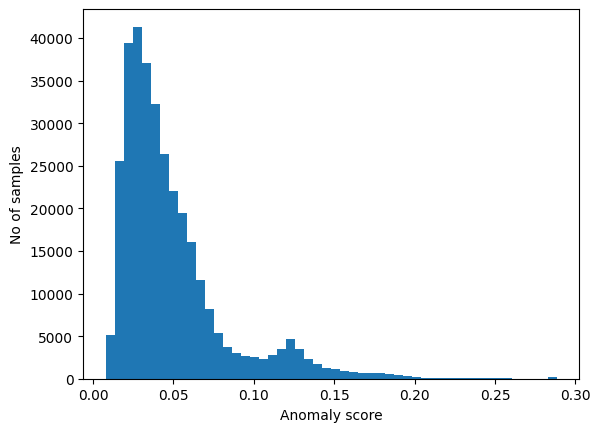

In [45]:
plt.hist(lista, bins=50)
plt.xlabel("Anomaly score")
plt.ylabel("No of samples")
plt.show()

In [46]:
predicted_df['predictions'] = lista

In [47]:
predicted_df

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x,predictions
2016-01-04 00:00:00,69,Parking,0.139088,0.757143,0,0,0,0.5,1.000000,0.110777
2016-01-04 01:00:00,69,Parking,0.139088,0.760317,0,0,0,0.5,1.000000,0.106562
2016-01-04 02:00:00,69,Parking,0.139088,0.746032,0,0,0,0.5,1.000000,0.103322
2016-01-04 03:00:00,69,Parking,0.139088,0.742857,0,0,0,0.5,1.000000,0.100433
2016-01-04 04:00:00,69,Parking,0.139088,0.738095,0,0,0,0.5,1.000000,0.097744
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.0,0.356896,0.026609
2016-12-31 20:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.0,0.356896,0.027109
2016-12-31 21:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.0,0.356896,0.027646
2016-12-31 22:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.0,0.356896,0.028268


In [48]:
predicted_df.predictions.min(), predicted_df.predictions.max()

(0.007869916036725044, 0.2882612645626068)

In [49]:
perc = 90
threshold = (np.percentile(predicted_df.predictions.values, perc))
threshold

0.09490934014320374

In [50]:
predicted_df['threshold'] = threshold

In [51]:
predicted_df['predicted_anomaly'] = predicted_df.predictions > predicted_df['threshold']
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(False,0)
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(True,1)

In [52]:
predicted_df

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x,predictions,threshold,predicted_anomaly
2016-01-04 00:00:00,69,Parking,0.139088,0.757143,0,0,0,0.5,1.000000,0.110777,0.094909,1
2016-01-04 01:00:00,69,Parking,0.139088,0.760317,0,0,0,0.5,1.000000,0.106562,0.094909,1
2016-01-04 02:00:00,69,Parking,0.139088,0.746032,0,0,0,0.5,1.000000,0.103322,0.094909,1
2016-01-04 03:00:00,69,Parking,0.139088,0.742857,0,0,0,0.5,1.000000,0.100433,0.094909,1
2016-01-04 04:00:00,69,Parking,0.139088,0.738095,0,0,0,0.5,1.000000,0.097744,0.094909,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.0,0.356896,0.026609,0.094909,0
2016-12-31 20:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.0,0.356896,0.027109,0.094909,0
2016-12-31 21:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.0,0.356896,0.027646,0.094909,0
2016-12-31 22:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.0,0.356896,0.028268,0.094909,0


In [53]:
predicted_df.predicted_anomaly.unique()

array([1, 0])

In [54]:
len(predicted_df[predicted_df.predicted_anomaly == 1])/len(predicted_df)

0.10000120825479678

In [55]:
predicted_df.index.names=['timestamp']
predicted_df= predicted_df.reset_index()

In [56]:
predicted_df = pd.merge(predicted_df, df[['timestamp','building_id']], on=['timestamp','building_id'])

In [57]:
print(classification_report(predicted_df.anomaly, predicted_df.predicted_anomaly))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    322044
           1       0.02      0.10      0.04      7635

    accuracy                           0.88    329679
   macro avg       0.50      0.50      0.49    329679
weighted avg       0.95      0.88      0.92    329679



In [58]:
roc_auc_score(predicted_df['anomaly'], predicted_df['predicted_anomaly'])

0.5026533153324008

## Testing (reconstruction-based)

For this we are going to consider non-overlapping windows.

In [59]:
X_test, y_test = create_multivariate_test_sequences(test, train_window)

In [60]:
X_test.shape, y_test.shape

((4636, 72, 5), (4636, 72))

In [61]:
test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(X_test).float().contiguous().view(([X_test.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [62]:
results, w1, w2 = testing_prova(model, test_loader)

In [63]:
w1

[tensor([[4.6237e-01, 6.4994e-01, 1.9445e-01,  ..., 8.8643e-01, 5.4790e-01,
          8.6416e-02],
         [3.3021e-01, 6.8705e-01, 1.0000e+00,  ..., 2.0212e-10, 9.9659e-01,
          1.6714e-30],
         [4.8170e-01, 6.6022e-01, 2.1741e-01,  ..., 6.1786e-01, 5.5395e-02,
          5.2270e-03],
         ...,
         [5.1189e-01, 6.8604e-01, 2.0924e-01,  ..., 9.2370e-01, 7.8831e-01,
          6.3538e-03],
         [5.2577e-01, 6.5118e-01, 7.5041e-01,  ..., 6.1772e-02, 6.0207e-02,
          9.3727e-06],
         [4.9249e-01, 6.6178e-01, 1.9163e-01,  ..., 9.3638e-01, 7.4430e-01,
          6.1467e-02]], device='cuda:0'),
 tensor([[5.5205e-01, 6.5920e-01, 9.9988e-01,  ..., 3.3159e-07, 5.3420e-01,
          1.8431e-19],
         [4.8654e-01, 6.6819e-01, 1.8687e-01,  ..., 8.5610e-01, 3.3907e-01,
          2.0290e-02],
         [3.6521e-01, 6.7771e-01, 9.9998e-01,  ..., 4.4360e-09, 9.8556e-01,
          2.4295e-26],
         ...,
         [5.0870e-01, 6.7062e-01, 2.1434e-01,  ..., 6.5291e-01

In [64]:
w2

[tensor([[0.4919, 0.6670, 0.1994,  ..., 0.7090, 0.3021, 0.0183],
         [0.4082, 0.6687, 0.9908,  ..., 0.0337, 0.9211, 0.0193],
         [0.4913, 0.6671, 0.2012,  ..., 0.7086, 0.3076, 0.0184],
         ...,
         [0.4914, 0.6671, 0.2008,  ..., 0.7087, 0.3065, 0.0184],
         [0.4959, 0.7009, 0.7747,  ..., 0.1334, 0.2301, 0.0068],
         [0.4911, 0.6671, 0.2016,  ..., 0.7086, 0.3087, 0.0184]],
        device='cuda:0'),
 tensor([[0.4385, 0.6654, 0.9669,  ..., 0.0686, 0.7733, 0.0179],
         [0.4920, 0.6670, 0.1993,  ..., 0.7090, 0.3020, 0.0183],
         [0.4132, 0.6682, 0.9886,  ..., 0.0380, 0.9047, 0.0191],
         ...,
         [0.4912, 0.6671, 0.2014,  ..., 0.7086, 0.3082, 0.0184],
         [0.4459, 0.6738, 0.8300,  ..., 0.3003, 0.8696, 0.0140],
         [0.5036, 0.7000, 0.7519,  ..., 0.1838, 0.2358, 0.0106]],
        device='cuda:0'),
 tensor([[0.4915, 0.6670, 0.2005,  ..., 0.7088, 0.3054, 0.0184],
         [0.4186, 0.6676, 0.9856,  ..., 0.0431, 0.8842, 0.0188],
        

In [65]:
len(w1)

37

In [67]:
len(w2)

37

In [68]:
len(w1[1]), len(w1[-1])

(128, 28)

In [69]:
len(w2[1]), len(w2[-1])

(128, 28)

In [80]:
# Fai reshape da [batch, 360] a [batch, 72, 5]
reshaped_w1 = [torch.reshape(w1_el, (w1_el.size()[0], int(w1_el.size()[1]/5), int(w1_el.size()[1]/72))) for w1_el in w1]
reshaped_w1_try = [torch.reshape(w1_el, (w1_el.size()[0]*w1_el.size()[1], w1_el.size()[2])) for w1_el in reshaped_w1]

In [81]:
len(reshaped_w1_try), reshaped_w1_try[0].size(), reshaped_w1_try[-1].size()

(37, torch.Size([9216, 5]), torch.Size([2016, 5]))

In [82]:
stacked = torch.stack(reshaped_w1_try[:-1])
stacked.shape

torch.Size([36, 9216, 5])

In [83]:
stacked_reshaped = torch.reshape(stacked, (stacked.size()[0] * stacked.size()[1], stacked.size()[2]))
stacked_reshaped.size()

torch.Size([331776, 5])

In [85]:
stacked_array = stacked_reshaped.cpu().numpy()
stacked_array.shape

(331776, 5)

In [86]:
last_array = reshaped_w1_try[-1].cpu().numpy()
last_array.shape

(2016, 5)

In [87]:
total1 = np.concatenate([stacked_array, last_array])
total1.shape

(333792, 5)

Let's do the same for w2.

In [88]:
# Fai reshape da [batch, 360] a [batch, 72, 5]
reshaped_w2 = [torch.reshape(w2_el, (w2_el.size()[0], int(w2_el.size()[1]/5), int(w2_el.size()[1]/72))) for w2_el in w2]
reshaped_w2_try = [torch.reshape(w2_el, (w2_el.size()[0]*w2_el.size()[1], w2_el.size()[2])) for w2_el in reshaped_w2]

In [89]:
stacked2 = torch.stack(reshaped_w2_try[:-1])
stacked2.shape

torch.Size([36, 9216, 5])

In [90]:
stacked_reshaped2 = torch.reshape(stacked2, (stacked2.size()[0] * stacked2.size()[1], stacked2.size()[2]))
stacked_reshaped2.size()

torch.Size([331776, 5])

In [91]:
stacked_array = stacked_reshaped2.cpu().numpy()
stacked_array

array([[0.49193242, 0.66698116, 0.19937964, 0.5664138 , 0.0286341 ],
       [0.4915422 , 0.667411  , 0.19819552, 0.5563369 , 0.02940779],
       [0.49074543, 0.66778755, 0.19744858, 0.54557467, 0.02989178],
       ...,
       [0.46418154, 0.6683548 , 0.69598824, 0.2899382 , 0.01095533],
       [0.4652343 , 0.6682237 , 0.70210445, 0.29823056, 0.01453487],
       [0.46631896, 0.6679891 , 0.7086494 , 0.307387  , 0.0183682 ]],
      dtype=float32)

In [92]:
last_array2 = reshaped_w2_try[-1].cpu().numpy()
last_array2

array([[0.37098345, 0.6882143 , 0.6810475 , 0.03388464, 0.00683409],
       [0.37269193, 0.6870987 , 0.7106919 , 0.03568853, 0.00792624],
       [0.37088063, 0.6876741 , 0.73918176, 0.03812898, 0.01017672],
       ...,
       [0.46418303, 0.6683581 , 0.6959826 , 0.29021904, 0.01095724],
       [0.46523678, 0.668227  , 0.70209104, 0.2985164 , 0.01453716],
       [0.4663224 , 0.6679931 , 0.70862895, 0.30767632, 0.01837082]],
      dtype=float32)

In [93]:
total2 = np.concatenate([stacked_array, last_array2])

In [94]:
total2.shape

(333792, 5)

Let's now try to see how this refers to the reconstructed time series.

In [95]:
w1_reco = pd.DataFrame(total1)
w1_reco

,0,1,2,3,4
0,0.462372,0.649939,0.194447,0.283853,0.039062
1,0.457057,0.647043,0.193035,0.259982,0.028513
2,0.457913,0.649312,0.205676,0.248769,0.022702
3,0.455634,0.652538,0.215561,0.237263,0.011040
4,0.457811,0.647678,0.227303,0.229121,0.014219
...,...,...,...,...,...
333787,0.405987,0.673691,0.455914,0.076708,0.000438
333788,0.405741,0.679075,0.491194,0.071471,0.007051
333789,0.403583,0.673031,0.524062,0.066405,0.012856
333790,0.400026,0.670795,0.561416,0.064609,0.006474


In [96]:
w2_reco = pd.DataFrame(total2)
w2_reco

,0,1,2,3,4
0,0.491932,0.666981,0.199380,0.566414,0.028634
1,0.491542,0.667411,0.198196,0.556337,0.029408
2,0.490745,0.667788,0.197449,0.545575,0.029892
3,0.489632,0.668519,0.197621,0.534027,0.020450
4,0.488678,0.669724,0.197265,0.522541,0.015986
...,...,...,...,...,...
333787,0.461598,0.669401,0.690885,0.280520,0.000015
333788,0.462679,0.668640,0.693689,0.284870,0.000174
333789,0.464183,0.668358,0.695983,0.290219,0.010957
333790,0.465237,0.668227,0.702091,0.298516,0.014537


The first column is the one we are interested in, as it refers to the meter reading. Let's create the final dataset and concatenate the reconstructions to it.

In [97]:
scaler = MinMaxScaler(feature_range=(0,1))

In [98]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading', 'sea_level_pressure', 'weekday_x', 'weekday_y']]=scaler.fit_transform(gdf[['meter_reading', 'sea_level_pressure', 'weekday_x', 'weekday_y']])
  dfs_dict_1[building_id] = gdf
predicted_df_test = pd.concat(dfs_dict_1.values())

In [102]:
predicted_df_test['reconstruction'] = w1_reco.loc[:, 0].values

In [103]:
predicted_df_test['reconstruction2'] = w2_reco.loc[:, 0].values

In [104]:
predicted_df_test

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x,reconstruction,reconstruction2
2016-01-01 00:00:00,69,Parking,0.350417,0.000000,1,0,4,0.277479,0.000000,0.462372,0.491932
2016-01-01 01:00:00,69,Parking,0.244752,0.828571,1,0,4,0.277479,0.000000,0.457057,0.491542
2016-01-01 02:00:00,69,Parking,0.191920,0.819048,1,0,4,0.277479,0.000000,0.457913,0.490745
2016-01-01 03:00:00,69,Parking,0.165504,0.807937,1,0,4,0.277479,0.000000,0.455634,0.489632
2016-01-01 04:00:00,69,Parking,0.152296,0.822222,1,0,4,0.277479,0.000000,0.457811,0.488678
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.405987,0.461598
2016-12-31 20:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.405741,0.462679
2016-12-31 21:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.403583,0.464183
2016-12-31 22:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.400026,0.465237


In [105]:
predicted_df_test.reconstruction2.min(), predicted_df_test.reconstruction2.max()

(0.34659934, 0.5632375)

In [106]:
predicted_df_test.reconstruction.min(), predicted_df_test.reconstruction.max()

(0.21660502, 0.8089575)

In [107]:
predicted_df_test.meter_reading.min(), predicted_df_test.meter_reading.max()

(0.0, 1.0000000000000002)

In [108]:
predicted_df_test['relative_loss'] = np.abs((predicted_df_test['reconstruction']-predicted_df_test['meter_reading'])/predicted_df_test['reconstruction'])

In [109]:
predicted_df_test['relative_loss2'] = np.abs((predicted_df_test['reconstruction2']-predicted_df_test['meter_reading'])/predicted_df_test['reconstruction2'])

In [110]:
#calculate threshold on relative loss quartiles but only on val, and in this case per building
thresholds=np.array([])
for building_id, gdf in predicted_df_test.groupby("building_id"):
  val_mre_loss_building= gdf['relative_loss'].values
  building_threshold = (np.percentile(val_mre_loss_building, 75)) + 1.5 *((np.percentile(val_mre_loss_building, 75))-(np.percentile(val_mre_loss_building, 25)))
  gdf['threshold']=building_threshold
  thresholds= np.append(thresholds, gdf['threshold'].values)
print(thresholds.shape)
predicted_df_test['threshold']= thresholds

(333792,)


In [111]:
#calculate threshold on relative loss quartiles but only on val, and in this case per building
thresholds=np.array([])
for building_id, gdf in predicted_df_test.groupby("building_id"):
  val_mre_loss_building= gdf['relative_loss2'].values
  building_threshold = (np.percentile(val_mre_loss_building, 75)) + 1.5 *((np.percentile(val_mre_loss_building, 75))-(np.percentile(val_mre_loss_building, 25)))
  gdf['threshold2']=building_threshold
  thresholds= np.append(thresholds, gdf['threshold2'].values)
print(thresholds.shape)
predicted_df_test['threshold2']= thresholds

(333792,)


In [112]:
predicted_df_test

,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x,reconstruction,reconstruction2,relative_loss,relative_loss2,threshold,threshold2
2016-01-01 00:00:00,69,Parking,0.350417,0.000000,1,0,4,0.277479,0.000000,0.462372,0.491932,0.242132,0.287673,1.081781,1.104386
2016-01-01 01:00:00,69,Parking,0.244752,0.828571,1,0,4,0.277479,0.000000,0.457057,0.491542,0.464504,0.502072,1.081781,1.104386
2016-01-01 02:00:00,69,Parking,0.191920,0.819048,1,0,4,0.277479,0.000000,0.457913,0.490745,0.580881,0.608921,1.081781,1.104386
2016-01-01 03:00:00,69,Parking,0.165504,0.807937,1,0,4,0.277479,0.000000,0.455634,0.489632,0.636760,0.661982,1.081781,1.104386
2016-01-01 04:00:00,69,Parking,0.152296,0.822222,1,0,4,0.277479,0.000000,0.457811,0.488678,0.667338,0.688350,1.081781,1.104386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.405987,0.461598,0.171129,0.270987,0.784571,0.807120
2016-12-31 20:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.405741,0.462679,0.170626,0.272690,0.784571,0.807120
2016-12-31 21:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.403583,0.464183,0.166193,0.275047,0.784571,0.807120
2016-12-31 22:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.400026,0.465237,0.158777,0.276689,0.784571,0.807120


In [113]:
predicted_df_test['predicted_anomaly'] = predicted_df_test['relative_loss'] > predicted_df_test['threshold']
predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(False,0)
predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(True,1)

In [114]:
predicted_df_test['predicted_anomaly2'] = predicted_df_test['relative_loss2'] > predicted_df_test['threshold2']
predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(False,0)
predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(True,1)

In [115]:
predicted_df_test.index.names=['timestamp']
predicted_df_test= predicted_df_test.reset_index()

In [116]:
predicted_df_test.predicted_anomaly.unique()

array([0, 1])

In [117]:
predicted_df_test.predicted_anomaly2.unique()

array([0, 1])

In [118]:
predicted_anomalies = predicted_df_test.loc[predicted_df_test['predicted_anomaly'] == 1]
predicted_anomalies2 = predicted_df_test.loc[predicted_df_test['predicted_anomaly2'] == 1]
true_anomalies = predicted_df_test.loc[predicted_df_test['anomaly'] == 1]

In [119]:
predicted_df_test = pd.merge(predicted_df_test, df[['timestamp','building_id']], on=['timestamp','building_id'])

In [120]:
print(classification_report(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    324574
           1       0.34      0.32      0.33      7767

    accuracy                           0.97    332341
   macro avg       0.66      0.65      0.66    332341
weighted avg       0.97      0.97      0.97    332341



In [121]:
print(classification_report(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly2']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    324574
           1       0.39      0.32      0.35      7767

    accuracy                           0.97    332341
   macro avg       0.69      0.65      0.67    332341
weighted avg       0.97      0.97      0.97    332341



In [122]:
roc_auc_score(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly'])

0.6506594194962843

In [123]:
roc_auc_score(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly2'])

0.6526695751197159

In [124]:
predicted_df_test.building_id.unique()

array([  69,   79,  119,  139,  144,  149,  159,  174,  254,  439,  534,
        729,  739,  844,  879,  884,  889,  894,  909,  914,  919,  924,
        929,  969,  974,  994, 1074, 1219, 1234, 1239, 1249, 1259, 1264,
       1279, 1284, 1304, 1309, 1319])

In [129]:
visualizations = predicted_df_test[predicted_df_test.building_id == 1319]
visualizations

,timestamp,building_id,primary_use,meter_reading,sea_level_pressure,is_holiday,anomaly,weekday,weekday_y,weekday_x,reconstruction,reconstruction2,relative_loss,relative_loss2,threshold,threshold2,predicted_anomaly,predicted_anomaly2
323557,2016-01-01 00:00:00,1319,Entertainment/public assembly,0.305583,0.707250,1,0,4,0.277479,0.000000,0.464921,0.491855,0.342722,0.378713,0.784571,0.80712,0,0
323558,2016-01-01 01:00:00,1319,Entertainment/public assembly,0.274762,0.700410,1,0,4,0.277479,0.000000,0.459608,0.491466,0.402182,0.440934,0.784571,0.80712,0,0
323559,2016-01-01 02:00:00,1319,Entertainment/public assembly,0.213133,0.697674,1,0,4,0.277479,0.000000,0.460394,0.490669,0.537064,0.565628,0.784571,0.80712,0,0
323560,2016-01-01 03:00:00,1319,Entertainment/public assembly,0.274762,0.699042,1,0,4,0.277479,0.000000,0.458042,0.489555,0.400138,0.438752,0.784571,0.80712,0,0
323561,2016-01-01 04:00:00,1319,Entertainment/public assembly,0.243946,0.697674,1,0,4,0.277479,0.000000,0.460258,0.488601,0.469980,0.500726,0.784571,0.80712,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332336,2016-12-31 19:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.405987,0.461598,0.171129,0.270987,0.784571,0.80712,0,0
332337,2016-12-31 20:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.405741,0.462679,0.170626,0.272690,0.784571,0.80712,0,0
332338,2016-12-31 21:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.403583,0.464183,0.166193,0.275047,0.784571,0.80712,0,0
332339,2016-12-31 22:00:00,1319,Entertainment/public assembly,0.336511,0.000000,0,0,5,0.000000,0.356896,0.400026,0.465237,0.158777,0.276689,0.784571,0.80712,0,0


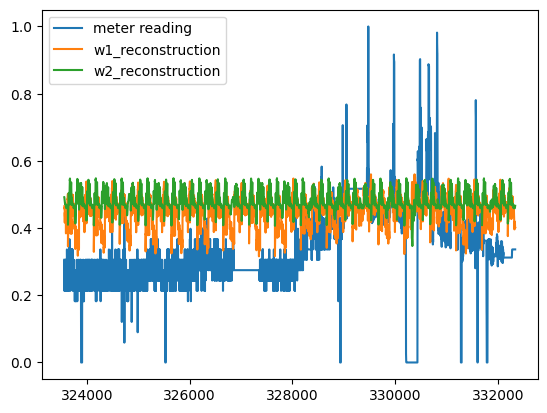

In [130]:
plt.plot(visualizations.meter_reading, label = "meter reading") #predicted_df_test.meter_reading[:8784]
plt.plot(visualizations.reconstruction, label = "w1_reconstruction")
plt.plot(visualizations.reconstruction2, label = "w2_reconstruction")
plt.legend()
plt.show()

In [133]:
predicted_anomalies1 = visualizations.loc[visualizations['predicted_anomaly'] == 1]
predicted_anomalies2 = visualizations.loc[visualizations['predicted_anomaly2'] == 1]
true_anomalies = visualizations.loc[visualizations['anomaly'] == 1]

In [136]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=visualizations.index, y=visualizations['meter_reading'], name='meter readings'))
fig.add_trace(go.Scatter(x=visualizations.index, y=visualizations['reconstruction'], name='meter readings reconstructed'))
fig.add_trace(go.Scatter(x=visualizations.index, y=visualizations['reconstruction2'], name='meter readings reconstructed'))
fig.add_trace(go.Scatter(x=true_anomalies.index, y=true_anomalies['meter_reading'], mode='markers', marker=dict(color='forestgreen'), name='True_Anomaly'))
fig.add_trace(go.Scatter(x=predicted_anomalies1.index, y=predicted_anomalies1['meter_reading'], mode='markers', marker=dict(color='yellow'), name='True_Anomaly'))
fig.add_trace(go.Scatter(x=predicted_anomalies2.index, y=predicted_anomalies2['meter_reading'], mode='markers', marker=dict(color='orange'), name='True_Anomaly'))
fig.update_layout(showlegend=True, title='meter readings predicted and anomalies - val')
fig.show()